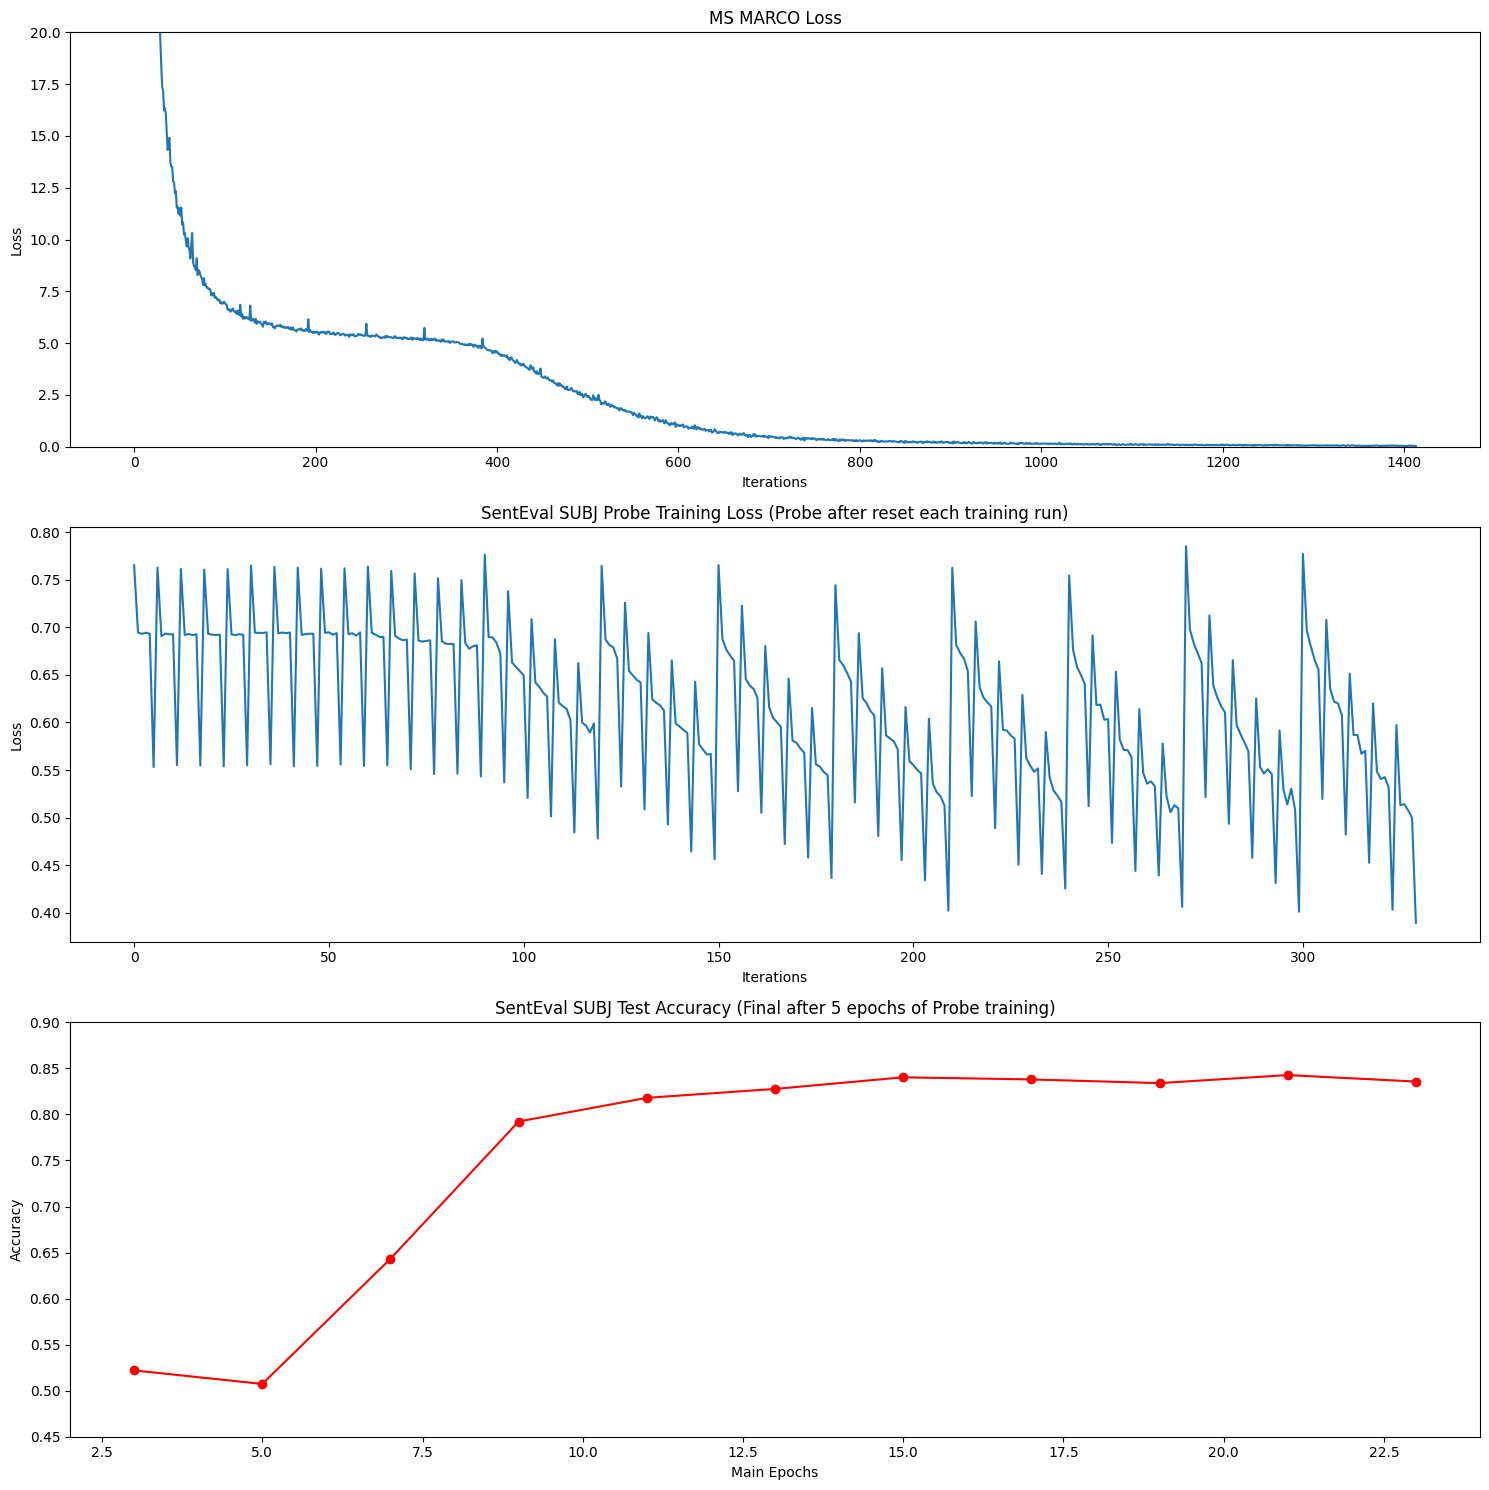

In [68]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store data
ms_marco_loss = []
senteval_loss = []
senteval_accuracy = []
accuracy_epochs = []

# Read the log file
with open('output.log', 'r') as f:
    lines = f.readlines()

# Parse the log file
MAX_MARCO_LOSS = 5000
MAX_SUBJ_PROBE_LOSS = 5000
current_main_epoch = 0
current_accuracies = []

for line in lines:
    if "Epoch" in line and "/100000" in line:
        match = re.search(r"Epoch (\d+)/100000", line)
        if match:
            new_main_epoch = int(match.group(1))
            if new_main_epoch != current_main_epoch:
                if current_accuracies:
                    senteval_accuracy.append(current_accuracies[-1])  # Append the last accuracy
                    accuracy_epochs.append(current_main_epoch)
                current_main_epoch = new_main_epoch
                current_accuracies = []
    
    if "MS MARCO Average Loss:" in line:
        match = re.search(r"MS MARCO Average Loss: (\d+\.\d+)", line)
        if match:
            ms_marco_loss.append(min(MAX_MARCO_LOSS, float(match.group(1))))
    
    elif "SentEval SUBJ Probe Training Loss:" in line:
        match = re.search(r"SentEval SUBJ Probe Training Loss: (\d+\.\d+)", line)
        if match and float(match.group(1)) != 0:
            senteval_loss.append(min(MAX_SUBJ_PROBE_LOSS, float(match.group(1))))
    
    elif "SentEval SUBJ Test Accuracy:" in line:
        match = re.search(r"SentEval SUBJ Test Accuracy: (\d+\.\d+)", line)
        if match:
            current_accuracies.append(float(match.group(1)))

# Add the last epoch's accuracy if it wasn't added in the loop
if current_accuracies:
    senteval_accuracy.append(current_accuracies[-1])
    accuracy_epochs.append(current_main_epoch)

# Create the plots
plt.figure(figsize=(15, 15))

# MS MARCO Loss
plt.subplot(3, 1, 1)
plt.plot(ms_marco_loss)
plt.title('MS MARCO Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.ylim(0.0, 20)  # Adjust y-axis limits for better visibility

# SentEval SUBJ Probe Training Loss
plt.subplot(3, 1, 2)
plt.plot(senteval_loss)
plt.title('SentEval SUBJ Probe Training Loss (Probe after reset each training run)')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# SentEval SUBJ Test Accuracy (Final accuracy for each evaluation)
plt.subplot(3, 1, 3)
plt.plot(accuracy_epochs, senteval_accuracy, 'ro-')
plt.title('SentEval SUBJ Test Accuracy (Final after 5 epochs of Probe training)')
plt.xlabel('Main Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.45, 0.9)  # Adjust y-axis limits for better visibility

plt.tight_layout()
plt.show()